Discarded missing values --> Living Area, Bedrooms

Discarded variables --> Tenement Building, Swimming Pool, Fireplaces

Assumed values --> Surface of the plot, Building condition, Kitchen type, Terrace, Garden, Frontages, Furnished

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pgeocode
from sklearn.preprocessing import OrdinalEncoder


%reload_ext autoreload
%autoreload 2

In [46]:
df = pd.read_csv('data/unclean_data.csv')
df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
0,9729720,APARTMENT,PENTHOUSE,179000,1140,Good,Semi equipped,1.0,Yes,9.0,No,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
1,9729785,APARTMENT,PENTHOUSE,255000,8370,Good,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
2,9729784,APARTMENT,PENTHOUSE,255000,8370,Good,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
3,9729780,APARTMENT,PENTHOUSE,620000,8370,Good,Installed,3.0,Yes,70.0,No,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
4,9727201,APARTMENT,PENTHOUSE,379000,1020,Good,USA hyper equipped,2.0,No,110.0,No,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000,1730,As new,NaN,1.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14537,7770553,APARTMENT,SERVICE_FLAT,177000,1730,As new,NaN,1.0,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
14538,7770551,APARTMENT,SERVICE_FLAT,190000,1730,As new,NaN,2.0,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
14539,7921693,APARTMENT,SERVICE_FLAT,1350000,5600,NaN,NaN,30.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN


### Remove Null Price rows and change type to float

In [47]:
df = df[pd.to_numeric(df['Price'], errors='coerce').notnull()]

In [48]:
df = df.astype({"Price": float}, errors='raise')

### Remove duplicate ID

In [49]:
df['Immoweb ID'].value_counts()

9691876    4
9662650    3
9597143    3
8237073    3
9687272    3
          ..
9623733    1
9245768    1
9606238    1
9695276    1
7921699    1
Name: Immoweb ID, Length: 13893, dtype: int64

In [50]:
df = df.drop_duplicates(['Immoweb ID'], keep='last')
df['Immoweb ID'].value_counts()

9729720    1
9678715    1
9697071    1
9557609    1
9678634    1
          ..
9518030    1
9622950    1
9478102    1
9620790    1
7921699    1
Name: Immoweb ID, Length: 13893, dtype: int64

### Remove subtype 

In [51]:
df = df[df['property sub-type'] != "APARTMENT_BLOCK"]
df['property sub-type'].value_counts()

VILLA                   2468
GROUND_FLOOR            1606
DUPLEX                  1580
MIXED_USE_BUILDING      1240
PENTHOUSE               1170
FLAT_STUDIO              873
EXCEPTIONAL_PROPERTY     566
SERVICE_FLAT             500
MANSION                  479
TOWN_HOUSE               383
COUNTRY_COTTAGE          292
LOFT                     271
BUNGALOW                 212
FARMHOUSE                171
TRIPLEX                   99
KOT                       95
CHALET                    94
MANOR_HOUSE               62
CASTLE                    50
Name: property sub-type, dtype: int64

### Building condition

In [52]:
df['Building condition'].value_counts()
df['Building condition'].unique()

array(['Good', nan, 'As new', 'To renovate', 'To be done up',
       'Just renovated', 'To restore'], dtype=object)

In [53]:
building_condition_map = {'As new': 6, 'Just renovated': 5, 'Good': 4, 'To be done up': 3, 'To renovate':2, 'To restore':1}
df = df.applymap(lambda s: building_condition_map.get(s) if s in building_condition_map else s)

### Fill missing values with 2

In [54]:
df['Building condition'] = df['Building condition'].fillna(2)
df['Building condition'].isnull().sum()

0

In [39]:
df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,Semi equipped,1.0,Yes,9.0,No,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,Installed,3.0,Yes,70.0,No,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,USA hyper equipped,2.0,No,110.0,No,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,NaN,1.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,NaN,1.0,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,NaN,2.0,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,NaN,30.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN


### Living area

### Remove missing values in Living area row

In [55]:
df = df.dropna(subset=['Living area'])

df = df.reset_index(drop=True)

df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,Semi equipped,1.0,Yes,9.0,No,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,Installed,3.0,Yes,70.0,No,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,USA hyper equipped,2.0,No,110.0,No,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,8041977,APARTMENT,SERVICE_FLAT,217000.0,9880,6.0,NaN,1.0,No,24.0,No,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN
9809,9459825,APARTMENT,SERVICE_FLAT,148500.0,9990,2.0,NaN,1.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN
9810,9581654,APARTMENT,SERVICE_FLAT,253515.0,3500,2.0,NaN,1.0,NaN,8.0,No,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN
9811,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,NaN,30.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN


In [56]:
# Test if there are null values in living area
df['Living area'].isnull().sum()

0

### Add City Column

In [57]:
nomi = pgeocode.Nominatim('be')
#nomi.query_postal_code('1040')['community_name']

def get_city(col):
    return nomi.query_postal_code(col['Post code'])['community_name']

df['City'] = df.apply(lambda col: get_city(col), axis=1)

In [58]:
df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,...,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation,City
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,Semi equipped,1.0,Yes,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,Arrondissement Brussel-Hoofdstad
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,Installed,1.0,Yes,46.0,...,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,Brugge
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,Installed,1.0,Yes,46.0,...,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,Brugge
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,Installed,3.0,Yes,70.0,...,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,Brugge
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,USA hyper equipped,2.0,No,110.0,...,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN,Arrondissement Brussel-Hoofdstad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,8041977,APARTMENT,SERVICE_FLAT,217000.0,9880,6.0,NaN,1.0,No,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,Gent
9809,9459825,APARTMENT,SERVICE_FLAT,148500.0,9990,2.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,Eeklo
9810,9581654,APARTMENT,SERVICE_FLAT,253515.0,3500,2.0,NaN,1.0,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,Hasselt
9811,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,NaN,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,Philippeville


### One Hot Encoding of Property type, property sub-type, Post code, City

In [59]:
df = pd.get_dummies(df, columns=['Property type', 'property sub-type', 'Post code', 'City'])

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,...,City_Soignies,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme
0,9729720,179000.0,4.0,Semi equipped,1.0,Yes,9.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,9729785,255000.0,4.0,Installed,1.0,Yes,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,9729784,255000.0,4.0,Installed,1.0,Yes,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,9729780,620000.0,4.0,Installed,3.0,Yes,70.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,9727201,379000.0,4.0,USA hyper equipped,2.0,No,110.0,No,3.0,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,8041977,217000.0,6.0,NaN,1.0,No,24.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9809,9459825,148500.0,2.0,NaN,1.0,NaN,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9810,9581654,253515.0,2.0,NaN,1.0,NaN,8.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9811,7921693,1350000.0,2.0,NaN,30.0,NaN,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Kitchen type	


In [60]:
Kit_type_dict = {"USA uninstalled" : 0, 
                 "Not installed" : 0, 
                 "Installed": 1, 
                 "USA installed": 1,
                 "Semi equipped": 1,
                 "USA semi equipped": 1,
                 "Hyper equipped": 2,
                 "USA hyper equipped": 2
                }

df = df.replace(Kit_type_dict)

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,...,City_Soignies,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme
0,9729720,179000.0,4.0,1.0,1.0,Yes,9.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,9729785,255000.0,4.0,1.0,1.0,Yes,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,9729784,255000.0,4.0,1.0,1.0,Yes,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,9729780,620000.0,4.0,1.0,3.0,Yes,70.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,9727201,379000.0,4.0,2.0,2.0,No,110.0,No,3.0,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,8041977,217000.0,6.0,NaN,1.0,No,24.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9809,9459825,148500.0,2.0,NaN,1.0,NaN,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9810,9581654,253515.0,2.0,NaN,1.0,NaN,8.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9811,7921693,1350000.0,2.0,NaN,30.0,NaN,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Fill Kitchen type rows with 0

In [61]:
df["Kitchen type"] = df["Kitchen type"].fillna(0)

"""
df = df.dropna(subset=['Kitchen type'])

df = df.reset_index(drop=True)
"""
df


,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,...,City_Soignies,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme
0,9729720,179000.0,4.0,1.0,1.0,Yes,9.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,9729785,255000.0,4.0,1.0,1.0,Yes,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,9729784,255000.0,4.0,1.0,1.0,Yes,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,9729780,620000.0,4.0,1.0,3.0,Yes,70.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,9727201,379000.0,4.0,2.0,2.0,No,110.0,No,3.0,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,8041977,217000.0,6.0,0.0,1.0,No,24.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9809,9459825,148500.0,2.0,0.0,1.0,NaN,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9810,9581654,253515.0,2.0,0.0,1.0,NaN,8.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9811,7921693,1350000.0,2.0,0.0,30.0,NaN,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Furnished


In [62]:
df['Furnished'].unique()

array(['Yes', 'No', nan], dtype=object)

In [63]:
df['Furnished'].isnull().sum()

2412

### Replace Furnished rows missing values with No

In [25]:
#df = df.dropna(subset=['Furnished'])

#df = df.reset_index(drop=True)
df['Furnished'] = df['Furnished'].fillna("No")

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,...,City_Soignies,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme
0,9729720,179000.0,4.0,1.0,1.0,Yes,9.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,9729785,255000.0,4.0,1.0,1.0,Yes,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,9729784,255000.0,4.0,1.0,1.0,Yes,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,9729780,620000.0,4.0,1.0,3.0,Yes,70.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,9727201,379000.0,4.0,2.0,2.0,No,110.0,No,3.0,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,8041977,217000.0,6.0,0.0,1.0,No,24.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9809,9459825,148500.0,2.0,0.0,1.0,No,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9810,9581654,253515.0,2.0,0.0,1.0,No,8.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9811,7921693,1350000.0,2.0,0.0,30.0,No,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


#### fill No to missing value then map to 1,0

In [26]:

df['Furnished'] = df['Furnished'].apply(lambda v: 0 if v == "No" else 1)

#### double check if value is 1, 0 and no missing value

In [27]:
print(df['Furnished'].unique())
print(df['Furnished'].isna().sum())

[1 0]
0


### Bedrooms


In [28]:
# Fill missing values with 2 bedrooms
#df['Bedrooms'] = df['Bedrooms'].fillna(2).astype(int)
#df["Bedrooms"].value_counts()

df['Bedrooms'].isnull().sum()



671

### Remove Bedrooms rows with missing values

In [29]:
df = df.dropna(subset=['Bedrooms'])

df = df.reset_index(drop=True)

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,...,City_Soignies,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme
0,9729720,179000.0,4.0,1.0,1.0,1,9.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,9729785,255000.0,4.0,1.0,1.0,1,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,9729784,255000.0,4.0,1.0,1.0,1,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,9729780,620000.0,4.0,1.0,3.0,1,70.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,9727201,379000.0,4.0,2.0,2.0,0,110.0,No,3.0,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,8041977,217000.0,6.0,0.0,1.0,0,24.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9138,9459825,148500.0,2.0,0.0,1.0,0,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9139,9581654,253515.0,2.0,0.0,1.0,0,8.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9140,7921693,1350000.0,2.0,0.0,30.0,0,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Terrace surface + Terrace	


#### Combine terrace & terrace surface in yes and no

In [26]:
df['Terrace_Combined'] = np.where(df['Terrace surface'].isnull() & df['Terrace'].isnull(), 'No', 'Yes')

#### Transform Terrace_Combined to 0 & 1

In [27]:
terrace = ['No', 'Yes']

ordenc = OrdinalEncoder(categories=[terrace])

df[["Terrace_Combined"]] = ordenc.fit_transform(df[["Terrace_Combined"]])

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,...,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined
0,9729720,179000.0,4.0,1.0,1.0,1,9.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
1,9729785,255000.0,4.0,1.0,1.0,1,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1.0
2,9729784,255000.0,4.0,1.0,1.0,1,46.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1.0
3,9729780,620000.0,4.0,1.0,3.0,1,70.0,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1.0
4,9727201,379000.0,4.0,2.0,2.0,0,110.0,No,3.0,No,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,8041977,217000.0,6.0,0.0,1.0,0,24.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9138,9459825,148500.0,2.0,0.0,1.0,0,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0
9139,9581654,253515.0,2.0,0.0,1.0,0,8.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9140,7921693,1350000.0,2.0,0.0,30.0,0,NaN,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0


#### Drop Terrace and Terrace Surface columns

In [28]:
df = df.drop(columns =['Terrace', 'Terrace surface'])

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,...,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined
0,9729720,179000.0,4.0,1.0,1.0,1,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
1,9729785,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
2,9729784,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
3,9729780,620000.0,4.0,1.0,3.0,1,No,2.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
4,9727201,379000.0,4.0,2.0,2.0,0,No,3.0,No,NaN,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,8041977,217000.0,6.0,0.0,1.0,0,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9138,9459825,148500.0,2.0,0.0,1.0,0,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0
9139,9581654,253515.0,2.0,0.0,1.0,0,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9140,7921693,1350000.0,2.0,0.0,30.0,0,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0


### ~~Tenement building	~~


In [29]:
df = df.drop(columns =['Tenement building'])

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,How many fireplaces?,Garden,...,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined
0,9729720,179000.0,4.0,1.0,1.0,1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
1,9729785,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
2,9729784,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
3,9729780,620000.0,4.0,1.0,3.0,1,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
4,9727201,379000.0,4.0,2.0,2.0,0,3.0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,8041977,217000.0,6.0,0.0,1.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9138,9459825,148500.0,2.0,0.0,1.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0
9139,9581654,253515.0,2.0,0.0,1.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9140,7921693,1350000.0,2.0,0.0,30.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0


### Drop Swimming pool	


In [30]:
# Fill missing values with value 0
#df['Swimming pool'].fillna(0, inplace = True)
#df['Swimming pool'] = df['Swimming pool'].apply(lambda v: 0 if v == "No" else 1)
df['Swimming pool'].isnull().sum()

5734

In [31]:
#df['Swimming pool'].unique()

In [32]:
df = df.drop(columns =['Swimming pool'])

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,How many fireplaces?,Garden,Surface of the plot,...,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined
0,9729720,179000.0,4.0,1.0,1.0,1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
1,9729785,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
2,9729784,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
3,9729780,620000.0,4.0,1.0,3.0,1,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
4,9727201,379000.0,4.0,2.0,2.0,0,3.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,8041977,217000.0,6.0,0.0,1.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9138,9459825,148500.0,2.0,0.0,1.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0
9139,9581654,253515.0,2.0,0.0,1.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9140,7921693,1350000.0,2.0,0.0,30.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0


### Garden + Garden surface	


In [33]:
print(df['Garden'].isna().sum())
print(df['Garden'].unique())

8137
[nan 'Yes']


In [34]:
df.loc[df['Garden surface'].isna()]

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,How many fireplaces?,Garden,Surface of the plot,...,City_Thuin,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined
0,9729720,179000.0,4.0,1.0,1.0,1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
1,9729785,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
2,9729784,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
3,9729780,620000.0,4.0,1.0,3.0,1,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
4,9727201,379000.0,4.0,2.0,2.0,0,3.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,8041977,217000.0,6.0,0.0,1.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9138,9459825,148500.0,2.0,0.0,1.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0
9139,9581654,253515.0,2.0,0.0,1.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
9140,7921693,1350000.0,2.0,0.0,30.0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0


#### Combine ['Garden'] and ['Garden surface] as ['garden_label] and map to 1,0

In [35]:
def categorise(col):  
    if col['Garden'] == "Yes" or col['Garden surface'] > 0:
        return 1
    return 0


df['garden_label'] = df.apply(lambda col: categorise(col), axis=1)

#### double check if value is 1, 0 and no missing value

In [36]:
df['garden_label'].unique()

array([0, 1])

#### drop column Garden and Garden surface

In [37]:
df = df.drop(columns =['Garden', 'Garden surface'])

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,How many fireplaces?,Surface of the plot,Living area,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9729720,179000.0,4.0,1.0,1.0,1,NaN,NaN,NaN,63.0,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,42.0,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,42.0,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,620000.0,4.0,1.0,3.0,1,2.0,NaN,NaN,150.0,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,379000.0,4.0,2.0,2.0,0,3.0,NaN,NaN,120.0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,8041977,217000.0,6.0,0.0,1.0,0,NaN,NaN,NaN,65.0,...,0,0,0,0,0,0,0,0,1.0,0
9138,9459825,148500.0,2.0,0.0,1.0,0,NaN,NaN,NaN,52.0,...,0,0,0,0,0,0,0,0,0.0,0
9139,9581654,253515.0,2.0,0.0,1.0,0,NaN,NaN,NaN,68.0,...,0,0,0,0,0,0,0,0,1.0,0
9140,7921693,1350000.0,2.0,0.0,30.0,0,NaN,NaN,NaN,1500.0,...,0,0,0,0,0,0,0,0,0.0,0


### ~~Garden orientation~~


#### Drop garden orientation

In [38]:
df = df.drop(columns =['Garden orientation'])

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,How many fireplaces?,Surface of the plot,Living area,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9729720,179000.0,4.0,1.0,1.0,1,NaN,NaN,NaN,63.0,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,42.0,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,255000.0,4.0,1.0,1.0,1,2.0,NaN,NaN,42.0,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,620000.0,4.0,1.0,3.0,1,2.0,NaN,NaN,150.0,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,379000.0,4.0,2.0,2.0,0,3.0,NaN,NaN,120.0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,8041977,217000.0,6.0,0.0,1.0,0,NaN,NaN,NaN,65.0,...,0,0,0,0,0,0,0,0,1.0,0
9138,9459825,148500.0,2.0,0.0,1.0,0,NaN,NaN,NaN,52.0,...,0,0,0,0,0,0,0,0,0.0,0
9139,9581654,253515.0,2.0,0.0,1.0,0,NaN,NaN,NaN,68.0,...,0,0,0,0,0,0,0,0,1.0,0
9140,7921693,1350000.0,2.0,0.0,30.0,0,NaN,NaN,NaN,1500.0,...,0,0,0,0,0,0,0,0,0.0,0


### ~~How many fireplaces?	~~


#### Discard fireplaces

In [39]:
df = df.drop(columns =["How many fireplaces?"])

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9729720,179000.0,4.0,1.0,1.0,1,NaN,NaN,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,255000.0,4.0,1.0,1.0,1,2.0,NaN,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,255000.0,4.0,1.0,1.0,1,2.0,NaN,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,620000.0,4.0,1.0,3.0,1,2.0,NaN,150.0,1,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,379000.0,4.0,2.0,2.0,0,3.0,NaN,120.0,1,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,8041977,217000.0,6.0,0.0,1.0,0,NaN,NaN,65.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9138,9459825,148500.0,2.0,0.0,1.0,0,NaN,NaN,52.0,1,...,0,0,0,0,0,0,0,0,0.0,0
9139,9581654,253515.0,2.0,0.0,1.0,0,NaN,NaN,68.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9140,7921693,1350000.0,2.0,0.0,30.0,0,NaN,NaN,1500.0,1,...,0,0,0,0,0,0,0,0,0.0,0


### Surface of the plot




### Fill empty values with 0

In [40]:
# Fill empty values with 0
df['Surface of the plot'].fillna(0, inplace = True)

print(df['Surface of the plot'].isna().sum())

0


In [41]:
"""
df = df.dropna(subset=['Surface of the plot'])

df = df.reset_index(drop=True)

df
"""

"\ndf = df.dropna(subset=['Surface of the plot'])\n\ndf = df.reset_index(drop=True)\n\ndf\n"

### Frontages

In [42]:
df['Number of frontages'].isnull().sum()

2202

In [43]:
"""
#get ['number of frontages'] with values and calc mean
selected_rows = df[~df['Number of frontages'].isnull()]
mean_num_of_frontages = selected_rows['Number of frontages'].mean(axis=0).round(0)
mean_num_of_frontages
"""

"\n#get ['number of frontages'] with values and calc mean\nselected_rows = df[~df['Number of frontages'].isnull()]\nmean_num_of_frontages = selected_rows['Number of frontages'].mean(axis=0).round(0)\nmean_num_of_frontages\n"

### Fill Number of frontages rows with missing values with 2

In [44]:
# fill 2 to missing value
df['Number of frontages'] = df['Number of frontages'].fillna(2)
df['Number of frontages'].isnull().sum()

0

In [45]:
"""
df = df.dropna(subset=['Number of frontages'])

df = df.reset_index(drop=True)

df
"""

"\ndf = df.dropna(subset=['Number of frontages'])\n\ndf = df.reset_index(drop=True)\n\ndf\n"

In [46]:
df['Number of frontages'] = df['Number of frontages'].astype(int)

In [47]:
# double check
df['Number of frontages'].value_counts()

2    4963
4    2994
3    1125
1      52
6       5
7       2
5       1
Name: Number of frontages, dtype: int64

### Final check missing value %




In [48]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by=['percent_missing'], ascending=False).head(10)

,column_name,percent_missing
Immoweb ID,Immoweb ID,0.0
Post code_7032,Post code_7032,0.0
Post code_6980,Post code_6980,0.0
Post code_6983,Post code_6983,0.0
Post code_6987,Post code_6987,0.0
Post code_6990,Post code_6990,0.0
Post code_6997,Post code_6997,0.0
Post code_7000,Post code_7000,0.0
Post code_7011,Post code_7011,0.0
Post code_7012,Post code_7012,0.0


In [49]:
df.columns.to_list()

['Immoweb ID',
 'Price',
 'Building condition',
 'Kitchen type',
 'Bedrooms',
 'Furnished',
 'Number of frontages',
 'Surface of the plot',
 'Living area',
 'Property type_APARTMENT',
 'Property type_HOUSE',
 'property sub-type_BUNGALOW',
 'property sub-type_CASTLE',
 'property sub-type_CHALET',
 'property sub-type_COUNTRY_COTTAGE',
 'property sub-type_DUPLEX',
 'property sub-type_EXCEPTIONAL_PROPERTY',
 'property sub-type_FARMHOUSE',
 'property sub-type_FLAT_STUDIO',
 'property sub-type_GROUND_FLOOR',
 'property sub-type_KOT',
 'property sub-type_LOFT',
 'property sub-type_MANOR_HOUSE',
 'property sub-type_MANSION',
 'property sub-type_MIXED_USE_BUILDING',
 'property sub-type_PENTHOUSE',
 'property sub-type_SERVICE_FLAT',
 'property sub-type_TOWN_HOUSE',
 'property sub-type_TRIPLEX',
 'property sub-type_VILLA',
 'Post code_1000',
 'Post code_1020',
 'Post code_1030',
 'Post code_1040',
 'Post code_1050',
 'Post code_1060',
 'Post code_1070',
 'Post code_1080',
 'Post code_1081',
 'Pos

## Outliers

### Bedrooms

#### Boxplot

<AxesSubplot:xlabel='Bedrooms'>

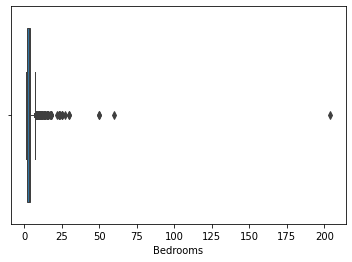

In [50]:
sns.boxplot(x='Bedrooms', data=df, width=0.8, linewidth=1)

#### Drop all properties with more than 20 bedrooms

In [51]:
df.drop(df[df['Bedrooms'] > 20].index, inplace = True)

In [52]:
df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9729720,179000.0,4.0,1.0,1.0,1,2,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,620000.0,4.0,1.0,3.0,1,2,0.0,150.0,1,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,379000.0,4.0,2.0,2.0,0,3,0.0,120.0,1,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,9653921,250000.0,6.0,1.0,1.0,0,4,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9136,9540791,369000.0,6.0,0.0,1.0,0,2,0.0,55.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9137,8041977,217000.0,6.0,0.0,1.0,0,2,0.0,65.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9138,9459825,148500.0,2.0,0.0,1.0,0,2,0.0,52.0,1,...,0,0,0,0,0,0,0,0,0.0,0


### Living Area

#### Boxplot

<AxesSubplot:xlabel='Living area'>

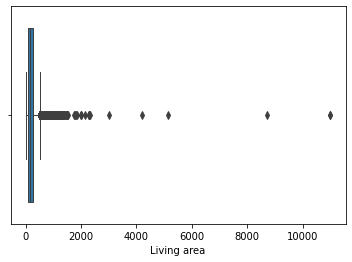

In [53]:
sns.boxplot(x='Living area', data=df, width=0.8, linewidth=1)

In [54]:
df[df['Living area'] > 2500]

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
2711,9711495,2300000.0,4.0,1.0,8.0,0,4,50000.0,11000.0,0,...,0,0,0,0,0,0,0,1,0.0,0
2713,9475248,2300000.0,4.0,1.0,8.0,0,4,50000.0,11000.0,0,...,0,0,0,0,0,0,0,1,0.0,0
3931,9702571,645000.0,4.0,2.0,4.0,0,4,0.0,4198.0,0,...,0,0,0,0,0,0,0,0,1.0,1
4941,9626629,935000.0,2.0,0.0,4.0,0,4,5000.0,8700.0,0,...,0,0,0,0,0,0,0,1,1.0,1
8041,9619982,1040000.0,6.0,0.0,9.0,0,4,5128.0,5128.0,0,...,0,0,0,0,0,0,0,0,0.0,0
8068,9641913,2817145.0,4.0,0.0,3.0,0,2,3602.0,3000.0,0,...,1,0,0,0,0,0,0,0,0.0,0


#### Drop all properties with Living area more than 2500

In [55]:
df.drop(df[df['Living area'] > 2500].index, inplace = True)

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9729720,179000.0,4.0,1.0,1.0,1,2,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,620000.0,4.0,1.0,3.0,1,2,0.0,150.0,1,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,379000.0,4.0,2.0,2.0,0,3,0.0,120.0,1,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,9653921,250000.0,6.0,1.0,1.0,0,4,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9136,9540791,369000.0,6.0,0.0,1.0,0,2,0.0,55.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9137,8041977,217000.0,6.0,0.0,1.0,0,2,0.0,65.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9138,9459825,148500.0,2.0,0.0,1.0,0,2,0.0,52.0,1,...,0,0,0,0,0,0,0,0,0.0,0


### Frontages

#### Boxplot

<AxesSubplot:xlabel='Number of frontages'>

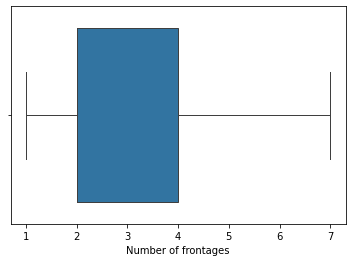

In [56]:
sns.boxplot(x='Number of frontages', data=df, width=0.8, linewidth=1)

In [57]:
df[df['Number of frontages'] > 4]

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
2132,9723884,495000.0,4.0,1.0,4.0,0,6,1070.0,262.0,0,...,0,0,0,0,0,0,0,0,1.0,1
2190,9660246,875000.0,4.0,1.0,8.0,0,6,32161.0,678.0,0,...,0,0,0,0,0,0,0,0,1.0,1
2423,9713345,98000.0,5.0,0.0,1.0,1,6,448.0,48.0,0,...,0,0,0,0,0,0,0,0,0.0,1
3370,9611825,550000.0,6.0,1.0,3.0,0,5,1980.0,370.0,0,...,0,0,0,0,0,0,0,0,1.0,1
3956,9718705,419000.0,2.0,0.0,4.0,0,6,658.0,272.0,0,...,0,0,0,0,0,0,0,0,0.0,1
5169,9722106,715000.0,2.0,0.0,6.0,0,6,1670.0,397.0,0,...,0,0,0,0,0,0,0,0,1.0,1
5383,9627226,1495000.0,2.0,1.0,5.0,0,7,1500.0,450.0,0,...,0,0,0,0,0,0,0,0,1.0,1
7088,9645024,249000.0,4.0,0.0,6.0,0,7,0.0,170.0,1,...,0,0,0,0,0,0,0,0,1.0,0


#### Drop all properties with Number of frontages more than 4

In [58]:
df.drop(df[df['Number of frontages'] > 4].index, inplace = True)

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9729720,179000.0,4.0,1.0,1.0,1,2,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,620000.0,4.0,1.0,3.0,1,2,0.0,150.0,1,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,379000.0,4.0,2.0,2.0,0,3,0.0,120.0,1,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,9653921,250000.0,6.0,1.0,1.0,0,4,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9136,9540791,369000.0,6.0,0.0,1.0,0,2,0.0,55.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9137,8041977,217000.0,6.0,0.0,1.0,0,2,0.0,65.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9138,9459825,148500.0,2.0,0.0,1.0,0,2,0.0,52.0,1,...,0,0,0,0,0,0,0,0,0.0,0


### Surface of plot

#### Boxplot

<AxesSubplot:xlabel='Surface of the plot'>

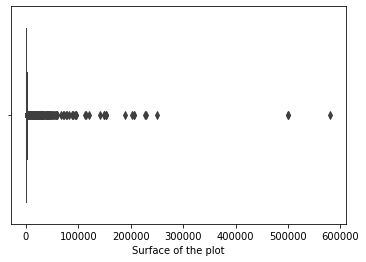

In [59]:
sns.boxplot(x='Surface of the plot', data=df, width=0.8, linewidth=1)

In [60]:
df[df['Surface of the plot'] > 100000]

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
2181,9705229,1495000.0,2.0,0.0,4.0,0,4,119700.0,850.0,0,...,0,0,0,0,0,0,0,0,0.0,0
2702,9617005,5500000.0,6.0,2.0,14.0,0,4,206200.0,2300.0,0,...,0,0,0,0,0,0,0,0,1.0,1
2703,9219731,9500000.0,6.0,1.0,12.0,0,4,500000.0,1100.0,0,...,0,0,0,0,0,0,0,0,1.0,0
2706,9641474,5500000.0,4.0,1.0,14.0,0,4,206263.0,2300.0,0,...,0,0,0,0,0,0,0,0,1.0,0
2707,9409948,3950000.0,6.0,2.0,14.0,0,4,153030.0,1240.0,0,...,0,0,0,0,0,0,0,0,1.0,1
2708,9422665,3950000.0,6.0,2.0,14.0,0,4,153030.0,1240.0,0,...,0,0,0,0,0,0,0,0,1.0,1
2709,9422666,3950000.0,6.0,2.0,14.0,0,4,153030.0,1240.0,0,...,0,0,0,0,0,0,0,0,1.0,1
2712,9349668,9500000.0,4.0,2.0,7.0,0,4,500000.0,1100.0,0,...,0,0,0,0,0,0,0,0,0.0,0
2714,9397963,4950000.0,2.0,1.0,5.0,0,4,148400.0,1079.0,0,...,0,0,0,0,0,0,0,0,1.0,0
2718,9394340,4950000.0,2.0,2.0,5.0,0,4,148400.0,1079.0,0,...,0,0,0,0,0,0,0,0,1.0,0


#### Drop all properties with Surface of the plot more than 100000

In [61]:
df.drop(df[df['Surface of the plot'] > 100000].index, inplace = True)

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9729720,179000.0,4.0,1.0,1.0,1,2,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,620000.0,4.0,1.0,3.0,1,2,0.0,150.0,1,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,379000.0,4.0,2.0,2.0,0,3,0.0,120.0,1,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,9653921,250000.0,6.0,1.0,1.0,0,4,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9136,9540791,369000.0,6.0,0.0,1.0,0,2,0.0,55.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9137,8041977,217000.0,6.0,0.0,1.0,0,2,0.0,65.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9138,9459825,148500.0,2.0,0.0,1.0,0,2,0.0,52.0,1,...,0,0,0,0,0,0,0,0,0.0,0


### Price

#### Boxplot

<AxesSubplot:xlabel='Price'>

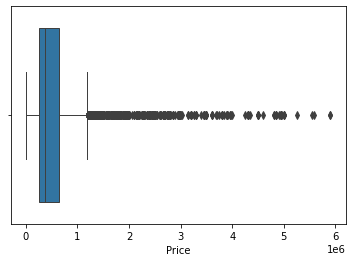

In [62]:
sns.boxplot(x='Price', data=df, width=0.8, linewidth=1)

In [63]:
df[df['Price'] < 100000]

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
23,9554723,79000.0,4.0,1.0,2.0,0,2,0.0,77.0,1,...,0,0,0,0,0,0,0,0,0.0,0
89,9530513,79000.0,4.0,1.0,1.0,0,2,0.0,76.0,1,...,0,0,0,0,0,0,0,0,0.0,0
117,9281981,85000.0,3.0,1.0,2.0,0,2,0.0,60.0,1,...,0,0,0,0,0,0,0,0,0.0,0
962,9602891,99000.0,3.0,1.0,1.0,0,4,0.0,70.0,1,...,0,0,0,0,0,0,0,0,1.0,1
1053,9444872,99000.0,2.0,0.0,1.0,0,2,0.0,60.0,1,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,9522255,95000.0,4.0,1.0,1.0,0,2,0.0,34.0,1,...,0,0,0,0,0,0,0,0,0.0,0
9014,9570785,99000.0,3.0,0.0,1.0,0,2,0.0,49.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9015,9570784,99000.0,3.0,0.0,1.0,0,2,0.0,49.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9022,6855819,99000.0,2.0,1.0,1.0,0,2,0.0,41.0,1,...,0,0,0,0,0,0,0,0,0.0,0


#### Drop all properties with Price less than 100000

In [64]:
df.drop(df[df['Price'] < 100000].index, inplace = True)

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9729720,179000.0,4.0,1.0,1.0,1,2,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,255000.0,4.0,1.0,1.0,1,2,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,620000.0,4.0,1.0,3.0,1,2,0.0,150.0,1,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,379000.0,4.0,2.0,2.0,0,3,0.0,120.0,1,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,9653921,250000.0,6.0,1.0,1.0,0,4,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9136,9540791,369000.0,6.0,0.0,1.0,0,2,0.0,55.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9137,8041977,217000.0,6.0,0.0,1.0,0,2,0.0,65.0,1,...,0,0,0,0,0,0,0,0,1.0,0
9138,9459825,148500.0,2.0,0.0,1.0,0,2,0.0,52.0,1,...,0,0,0,0,0,0,0,0,0.0,0


In [65]:
price_corr = df.corr()['Price']

price_corr_10 = price_corr[np.argsort(price_corr, axis=0)[::-1]]

In [66]:
print('Top 10 positive correlation are:')
print(price_corr_10.head(10))
print('.....................................')
print('Top 10 negative correlation are:')
print(price_corr_10.tail(10))

Top 10 positive correlation are:
Price                                     1.000000
Living area                               0.618560
Bedrooms                                  0.467959
Surface of the plot                       0.316309
Property type_HOUSE                       0.262206
property sub-type_VILLA                   0.219086
Post code_7970                           -0.006068
Number of frontages                       0.205299
property sub-type_EXCEPTIONAL_PROPERTY    0.202103
Post code_1180                            0.180078
Name: Price, dtype: float64
.....................................
Top 10 negative correlation are:
property sub-type_BUNGALOW       -0.055948
Immoweb ID                       -0.070067
property sub-type_TOWN_HOUSE     -0.074513
Post code_9991                   -0.000721
City_Dinant                      -0.035971
property sub-type_FLAT_STUDIO    -0.097496
property sub-type_DUPLEX         -0.114905
property sub-type_SERVICE_FLAT   -0.116801
property sub-t

## Remove Apartments

### Create a copy of the dataframe

In [72]:
df_house = df.copy()

In [73]:
df_house.drop(df_house[df_house['Property type_APARTMENT'] == 1].index, inplace = True)

df_house.drop('Property type_APARTMENT', axis=1, inplace=True)

df_house

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_HOUSE,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
2084,9704507,280000.0,6.0,2.0,3.0,0,3,557.0,120.0,1,...,0,0,0,0,0,0,0,1,1.0,1
2085,9677762,300000.0,2.0,0.0,4.0,0,3,4290.0,172.0,1,...,0,0,0,0,0,0,0,0,1.0,1
2086,9536498,249000.0,4.0,1.0,2.0,0,4,780.0,195.0,1,...,0,0,0,0,0,0,0,0,0.0,1
2087,9621908,525000.0,2.0,1.0,3.0,0,4,2195.0,365.0,1,...,0,0,0,0,0,0,0,0,1.0,0
2088,9642474,250000.0,2.0,0.0,4.0,0,4,2565.0,186.0,1,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8717,9668095,120000.0,2.0,0.0,2.0,0,3,0.0,140.0,1,...,0,0,0,0,0,0,0,0,0.0,0
8718,9693474,499000.0,2.0,0.0,5.0,0,2,125.0,400.0,1,...,0,0,0,0,0,0,0,0,0.0,0
8719,9637246,329000.0,2.0,1.0,3.0,0,2,0.0,120.0,1,...,0,0,0,0,0,0,0,0,0.0,0
8720,9673340,235000.0,2.0,1.0,4.0,0,2,0.0,146.0,1,...,0,0,0,0,0,0,0,0,0.0,0


In [75]:
df_villa = df_house.copy()

In [76]:
df_villa.drop(df_villa[df_villa['property sub-type_VILLA'] == 0].index, inplace = True)

#df_house.drop('Property type_APARTMENT', axis=1, inplace=True)

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_HOUSE,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
2743,9724903,200000.0,4.0,0.0,3.0,0,4,542.0,130.0,1,...,0,0,0,0,0,0,0,0,0.0,1
2744,9718593,480000.0,2.0,1.0,3.0,0,4,1346.0,150.0,1,...,0,0,0,0,0,0,0,0,1.0,1
2745,9720566,660000.0,4.0,2.0,5.0,0,4,718.0,175.0,1,...,0,0,0,0,0,0,0,0,1.0,1
2746,9714659,850000.0,4.0,0.0,4.0,0,4,2868.0,295.0,1,...,0,0,0,0,0,0,0,0,1.0,1
2747,9714663,1290000.0,2.0,1.0,5.0,0,4,780.0,307.0,1,...,0,0,0,0,0,0,0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,9262114,550000.0,2.0,1.0,5.0,0,4,9750.0,350.0,1,...,0,0,0,0,0,0,0,0,1.0,1
4811,9549142,350000.0,6.0,0.0,4.0,0,4,850.0,140.0,1,...,0,0,0,0,0,0,0,0,1.0,0
4812,9626322,2175000.0,6.0,0.0,6.0,0,4,12000.0,650.0,1,...,0,0,0,0,0,0,0,0,0.0,0
4813,9672331,1275000.0,2.0,0.0,5.0,0,4,2368.0,386.0,1,...,0,0,0,0,0,0,0,0,0.0,0


### Create a CSV File

In [67]:
#df.to_csv('data/clean_data_rmv_some_miss_values.csv', index=False)

In [71]:
#df.to_csv('data/clean_data_rmv_some_miss_values_rmv_apts.csv', index=False)

In [77]:
df_villa.to_csv('data/clean_data_rmv_some_miss_values_only_villa.csv', index=False)

In [1]:
df['property sub-type'].value_counts()

NameError: name 'df' is not defined